# [CPSC 322]() Data Science Algorithms
[Gonzaga University](https://www.gonzaga.edu/) |
[Sophina Luitel](https://www.gonzaga.edu/school-of-engineering-applied-science/faculty/detail/sophina-luitel-phd-0dba6a9d)

---

# Visualization and Pruning
What are our learning objectives for this lesson?
* Visualize trees
* Prune decision trees

Content used in this lesson is based upon information in the following sources:
* Dr. Gina Sprint's Data Science Algorithms notes

## Today
* Announcements
    * Please update the [Project Partner Finder ](https://gonzagau-my.sharepoint.com/:x:/g/personal/luitel_gonzaga_edu/EfuIbnY5Mg5Iq3R_ggRPPaABeaFXG2zcf7U0Objmr_qwZQ?e=mFkvBS) sheet by the end of today.
    * Project Prosopal due on 14th Nov (coming friday)
    * LA11 due tonight.
* Go over Decision Tree Implementation
* Tree Visualization (Install [graphviz](https://graphviz.org/) in your Docker container with `apt update`, `apt install gcc`, and `apt install graphviz`)
* Pruning notes


## Tree Visualization
[Graphviz](https://graphviz.org/) is a tool for creating graph images:
* Automatically lays out graphs (and trees)
* Uses a textual input language (called "dot")

To install dot and Graphviz:
* **Docker container:** run `apt update`, `apt install gcc`, and `apt install graphviz`
* **Mac:** run `pip install pygraphviz` or `conda install pygraphviz`
    * If for some reason the above fails, install graphviz with Homebrew by running `brew install graphviz`
    * Other install options available here: https://graphviz.gitlab.io/download/ 
* **Windows:** download the stable release of graphviz here:  
  https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    * Run the installer, making a note of the folder in which you install it
    * Find the folder where dot.exe is. It will be in the bin folder in the folder where you installed graphviz.
        * It is most likely something like C:\Program Files (x86)\Graphviz2.38\bin
    * Add this path to your PATH environment variable

**Basic DOT syntax** (see www.graphviz.org for more info):

```
graph g { // define a graph (also: digraph)
    rankdir=TB; // top-to-bottom layout (alt: LR)
    N1; // a node labeled N1 (id N1)
    N2 [label="Node 2"]; // a node labeled Node 2
    N1 -- N2; // N1 and N2 are connected by an edge, use -> for digraphs
    N3 [label="Node 3" shape=box]; // box shape
    N1 -- N3;
    N4 [style=filled fillcolor=Tomato]; // use color!
    N1 -- N4 [label="connected"]; // an edge label
    N4 -- N5; // nodes implied in edges
}
```
To create a PDF of a graph stored in file called in.dot: `dot -Tpdf -o out.pdf in.dot`

<img src="https://raw.githubusercontent.com/GonzagaCPSC322/U5-Decision-Trees/master/figures/dot_example.png" width="250"/>

### Inline Visualization in Jupyter Notebook

You can render trees directly inline using the graphviz Python package. This allows you to visualize graphs within the notebook without exporting to a separate file. For more detail: https://graphviz.readthedocs.io/en/stable/manual.html#jupyter-notebooks


graph {
	rankdir=TB
	N1
	N2 [label="Node 2"]
	N3 [label="Node 3" shape=box]
	N4 [fillcolor=Tomato style=filled]
	N1 -- N2
	N1 -- N3
	N1 -- N4 [label=connected]
	N4 -- N5
}



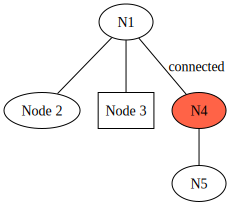

In [24]:
from graphviz import Graph  #Graph() for undirected, Digraph() for directed

#create graph
g = Graph()
g.attr(rankdir='TB')  #top-to-bottom layout

#add nodes
g.node('N1')
g.node('N2', label='Node 2')
g.node('N3', label='Node 3', shape='box')
g.node('N4', style='filled', fillcolor='Tomato')
#add edges
g.edge('N1', 'N2')  # N1 -- N2
g.edge('N1', 'N3')  # N1 -- N3
g.edge('N1', 'N4', label='connected')  # labeled edge
g.edge('N4', 'N5')  # nodes implied in edges
#shows the text representation
print(g.source)
#display
g

#save as PDF
#g.render('interview_tree', format='pdf',cleanup=True) #cleanup=True removes intermediate .dot file

### Lab Task
Create a dot file to visualize our interview dataset tree: 

<img src="https://raw.githubusercontent.com/DataScienceAlgorithms/M5_DecisionTrees/main/figures/job_candidate_tree.png" width="500"/>
<!--
```python

from graphviz import Graph

tree = Graph(comment='Interview Tree')
tree.attr(rankdir='TB', size='8,5')

tree.node('1', 'Level',shape='box')
tree.node('2', 'Tweets')
tree.edge('1', '2', label='Senior')

tree.node('4', 'True',style='filled', fillcolor='LightBlue',shape='box')
tree.edge('1', '4', label='Mid')

tree.node('3', 'Phd', shape='box')
tree.edge('1', '3', label='Junior')


tree.node('5', 'True')
tree.edge('2','5',label='Yes')
tree.node('6','False')
tree.edge('2','6', label= 'No')

tree.node('7', 'True')
tree.edge('3','7', label='Yes')
tree.node('8','False')
tree.edge('3','8',label='No')

tree
```
-->

## Overfitting and Pruning

When building a decision tree, each split adds conditions, making the rules more specialized.

Example:  

- Original rule:  
  `IF a = 1 AND b = yes AND z = red THEN class = OK`

- More specific: adding a condition:  
  `IF a = 1 AND b = yes AND z = red AND k = green THEN class = OK`

- More general: removing a condition:   
  `IF a = 1 AND b = yes THEN class = OK`

Too much specialization leads to **overfitting**, where the tree fits the training data perfectly but performs poorly on unseen data.

To reduce overfitting, pruning is applied:

- **Pre-pruning:** prevent the generation of non-significant branches  
- **Post-pruning:** generate the decision tree and then remove non-significant branches  

## Decision Tree Pruning
### Pre-pruning
* As the tree is being constructed, stop "early" on a path
* Instead of partitioning further, return majority vote or distribution
* For example, require a certain entropy threshold before further partitioning

### Post-pruning
* Remove subtrees after a tree has been generated
* Goal is to simplify the rules
* Various algorithms for doing the pruning ...

As an example, assume we have this within a decision tree:

<img src="https://raw.githubusercontent.com/DataScienceAlgorithms/M5_DecisionTrees/main/figures/pruning_example1.png" width="250"/>

* To prune, we might replace Attribute 3 with a leaf node
* e.g., with the most frequently occurring class
* e.g., if Yes nodes far outweigh No nodes under Attribute 3


Problem: To pick the best pruned tree, we have to construct all pruned trees (there can be a lot of these!)

Instead use heuristics: e.g., the **Cost Complexity** algorithm
* Cost complexity is a function of:
    * Number of leaves in the tree, and
    * Error-rate of the tree (percent of instances misclassified)
    * We want to minimize both the number of leaves (rules) and error rate
* Works bottom up:
    * At each attribute node, compute cost complexity
    * Compare this to pruned cost complexity
    * If pruning lowers cost complexity, then prune
    * Otherwise keep un-pruned